<a href="https://colab.research.google.com/github/Shohail786/L-layers_NN_for_classification/blob/main/L_layer_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import h5py
import copy
import sklearn
import sklearn.datasets
import sklearn.linear_model

In [ ]:
trainfile="/content/drive/MyDrive/DataSet_cat&non-cat/train_catvnoncat.h5"
testfile="/content/drive/MyDrive/DataSet_cat&non-cat/test_catvnoncat.h5"

In [ ]:
def load_dataset():
  train_dataset=h5py.File(trainfile,"r")
  train_set_x_orig=np.array(train_dataset["train_set_x"][:])
  train_set_y_orig=np.array(train_dataset["train_set_y"][:])
  train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_dataset=h5py.File(testfile,'r')
  test_set_x_orig=np.array(test_dataset["test_set_x"][:])
  test_set_y_orig=np.array(test_dataset["test_set_y"][:])
  test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
  classes=np.array(test_dataset["list_classes"][:])
  return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes


In [ ]:
def load_dataset():
  train_dataset=h5py.File(trainfile,"r")
  train_set_x_orig=np.array(train_dataset["train_set_x"][:])
  train_set_y_orig=np.array(train_dataset["train_set_y"][:])
  train_set_y_orig=train_set_y_orig.reshape((1,train_set_y_orig.shape[0]))
  test_dataset=h5py.File(testfile,'r')
  test_set_x_orig=np.array(test_dataset["test_set_x"][:])
  test_set_y_orig=np.array(test_dataset["test_set_y"][:])
  test_set_y_orig=test_set_y_orig.reshape((1,test_set_y_orig.shape[0]))
  classes=np.array(test_dataset["list_classes"][:])
  return train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes


In [ ]:
train_set_x_orig,train_set_y_orig,test_set_x_orig,test_set_y_orig,classes=load_dataset()

y=[0] , it's a non-cat picture


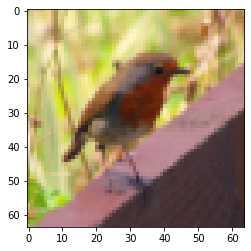

In [ ]:
index=10
plt.imshow(train_set_x_orig[index])
print("y="+str(train_set_y_orig[:,index])+" , it's a "+classes[np.squeeze(train_set_y_orig[:,index])].decode("utf-8")+" picture")

In [ ]:
m_train=train_set_x_orig.shape[0]
m_test=test_set_x_orig.shape[0]
img_dim=train_set_x_orig.shape[1]
print("m_train: "+str(m_train))
print("m_test: "+str(m_test))
print("img_dim: "+str(img_dim))

m_train: 209
m_test: 50
img_dim: 64


In [ ]:
#flatten the image dim to a vector (img_dim*img_dim*3,1)
train_set_x_flatten=train_set_x_orig.reshape(m_train,-1).T
print(train_set_x_flatten.shape)
test_set_x_flatten=test_set_x_orig.reshape(m_test,-1).T
print(test_set_x_flatten.shape)

(12288, 209)
(12288, 50)


In [ ]:
#standardize the dataset or preprocess
#image divide by 255
train_set_x=train_set_x_flatten/255
test_set_x=test_set_x_flatten/255


In [ ]:

noisy_circles=sklearn.datasets.make_circles(n_samples=200,factor=0.8,noise=.3)
noisy_moons=sklearn.datasets.make_moons(n_samples=200,noise=.2)
X1,Y1=noisy_circles
X1,Y1=X1.T,Y1.reshape(1,Y1.shape[0])
print(X1.shape)
print(Y1.shape)
X2,Y2=noisy_moons
X2,Y2=X2.T,Y2.reshape(1,Y2.shape[0])
print(X2.shape)
print(Y2.shape)



(2, 200)
(1, 200)
(2, 200)
(1, 200)


In [ ]:
def layer_sizes(X1,Y1):
  n_x=X1.shape[0];
  n_y=Y1.shape[0];
  n_h=4;
  return (n_x,n_y,n_h)

In [ ]:
def initialize_parameters_deep(layer_dims):
  np.random.seed(1)
  parameters={}
  L=len(layer_dims)
  for l in range(1,L):
    parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) / np.sqrt(layer_dims[l-1])
    parameters['b'+str(l)]=np.zeros((layer_dims[l],1))

  return parameters

In [ ]:
def relu(Z):
  A=np.maximum(0,Z)
  cache=Z
  return A,cache

In [ ]:
def sigmoid(Z):
  A=1/(1+np.exp(-Z))
  cache=Z
  return A,cache

In [ ]:
def linear_forward(A,W,b):
  Z=np.dot(W,A)+b
  cache=(A,W,b)
  return Z,cache

In [ ]:
def linear_activation_forward(A_prev,W,b,activation):
  if activation=="sigmoid":
    Z,linear_cache=linear_forward(A_prev,W,b)
    A,activation_cache=sigmoid(Z)
  elif activation=="relu":
    Z,linear_cache=linear_forward(A_prev,W,b)
    A,activation_cache=relu(Z)
  cache=(linear_cache,activation_cache)
  return A,cache
#linear_cache=A_prev,W,b  \\ activation_cache=Z  \\ cache=A_prev,W,b,Z

In [ ]:
def L_model_forward(X,parameters):
  caches=[]
  A=X
  L=len(parameters)//2
  for l in range(1,L):
    A_prev = A 
    A, cache = linear_activation_forward(A_prev, parameters['W' + str(l)], parameters['b' + str(l)], activation = "relu")
    caches.append(cache)
  AL, cache = linear_activation_forward(A, parameters['W' + str(L)], parameters['b' + str(L)], activation = "sigmoid")
  caches.append(cache)
  
  return AL,caches

In [ ]:
def compute_cost(AL,Y):
  m=Y.shape[1]
  cost = (1./m) * (-np.dot(Y,np.log(AL).T) - np.dot(1-Y, np.log(1-AL).T))
  cost=np.squeeze(cost)
  return cost

In [ ]:
def linear_backward(dZ,cache):
  A_prev,W,b=cache
  m=A_prev.shape[1]
  dW=(1./m)*(np.dot(dZ,A_prev.T))
  db=(1./m)*np.sum(dZ,axis=1,keepdims=True)
  dA_prev=np.dot(W.T,dZ)
  return dA_prev,dW,db

In [ ]:
def diff_sigmoid(dA,cache):
  Z=cache
  s=1/(1+np.exp(-Z))
  dZ=dA*s*(1-s)
  return dZ

In [ ]:
def diff_relu(dA,cache):
  Z=cache
  dZ=np.array(dA,copy=True)
  dZ[Z<=0]=0
  return dZ

In [ ]:
def linear_activation_backward(dA,cache,activation):
    linear_cache,activation_cache=cache
    if activation=="relu":
      dZ=diff_relu(dA,activation_cache)
      dA_prev,dW,db=linear_backward(dZ,linear_cache)
    elif activation=="sigmoid":
      dZ=diff_sigmoid(dA,activation_cache)
      dA_prev,dW,db=linear_backward(dZ,linear_cache)
    return dA_prev,dW,db

In [ ]:
def L_model_backward(AL,Y,caches):
    grads={}
    L=len(caches)
    m=AL.shape[1]
    Y=Y.reshape(AL.shape)
    dAL=-(np.divide(Y,AL)-np.divide(1-Y,1-AL))
    current_cache=caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, activation = "sigmoid")
    for l in reversed(range(L-1)):
        current_cache=caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l + 1)], current_cache, activation = "relu")
        grads["dA"+str(l)]=dA_prev_temp
        grads["dW"+str(l+1)]=dW_temp
        grads["db"+str(l+1)]=db_temp
    return grads


In [ ]:
def update_parameters(parameters,grads,learning_rate):
    
    L=len(parameters)//2
    for l in range(L):
      parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate * grads["dW" + str(l+1)]
      parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate * grads["db" + str(l+1)]
    return parameters


In [ ]:
layers_dims=[12288,20,7,5,1]

In [ ]:
n_x=layer_sizes(X1,Y1)[0]
layers_dims1=[n_x,20,7,5,1]

In [ ]:
def L_layer_model(X,Y,layers_dims,learning_rate=0.0075,num_iterations=3000,print_cost=False):
  np.random.seed(1)
  costs=[]
  
  parameters=initialize_parameters_deep(layers_dims)
  for i in range(0,num_iterations):
    AL,caches=L_model_forward(X,parameters)
    cost=compute_cost(AL,Y)
    grads=L_model_backward(AL,Y,caches)
    parameters=update_parameters(parameters,grads,learning_rate)
    if print_cost and i % 100 == 0 or i == num_iterations - 1:
       print("Cost after iteration {}: {}".format(i, np.squeeze(cost)))
    if i % 100 == 0 or i == num_iterations:
        costs.append(cost)
  return parameters,costs

In [ ]:
def predict(X,Y,parameters):
  m=X.shape[1]
  n=len(parameters)//2
  p=np.zeros((1,m))
  prob,caches=L_model_forward(X,parameters)
  for i in range(0,prob.shape[1]):
      if prob[0,i]>0.5:
         p[0,i]=1
      else:
         p[0,i]=0
  print("Accuracy: "  + str(np.sum((p == Y)/m)))
  return p

In [ ]:
parameters, costs = L_layer_model(train_set_x,train_set_y_orig, layers_dims,num_iterations=2500, print_cost = True)
print("Cost after first iteration: " + str(costs[0]))


Cost after iteration 0: 0.7717493284237686
Cost after iteration 100: 0.6720534400822914
Cost after iteration 200: 0.6482632048575212
Cost after iteration 300: 0.6115068816101354
Cost after iteration 400: 0.5670473268366111
Cost after iteration 500: 0.5401376634547801
Cost after iteration 600: 0.5279299569455267
Cost after iteration 700: 0.46547737717668514
Cost after iteration 800: 0.36912585249592794
Cost after iteration 900: 0.39174697434805344
Cost after iteration 1000: 0.3151869888600617
Cost after iteration 1100: 0.2726998441789385
Cost after iteration 1200: 0.23741853400268137
Cost after iteration 1300: 0.19960120532208644
Cost after iteration 1400: 0.18926300388463305
Cost after iteration 1500: 0.1611885466582775
Cost after iteration 1600: 0.14821389662363316
Cost after iteration 1700: 0.13777487812972944
Cost after iteration 1800: 0.12974017549190123
Cost after iteration 1900: 0.12122535068005212
Cost after iteration 2000: 0.1138206066863371
Cost after iteration 2100: 0.1078392

In [ ]:
predict_train=predict(train_set_x,train_set_y_orig,parameters)

Accuracy: 0.9856459330143539


In [ ]:
predict_test=predict(test_set_x,test_set_y_orig,parameters)

Accuracy: 0.8


In [ ]:
#prediction
def prediction(w,b,X):
  m=X.shape[1]
  Y_pred=np.zeros((1,m))
  w=w.reshape(X.shape[0],1)
  z=np.dot(w,X)+b
  A=1/(1+np.exp(-z))
  for i in range(A.shape[1]):
    if(A[0,i])>0.5:
      Y_pred[0,i]=1
    else:
      Y_pred[0,i]=0
  return Y_pred


Accuracy: 0.0
y= 0.0, this a non-cat


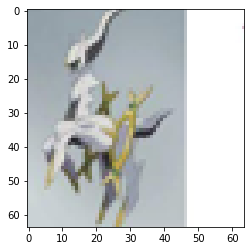

In [ ]:
from PIL import Image
from scipy import ndimage
fname="/content/drive/MyDrive/DataSet_cat&non-cat/Capture2.JPG"
f3name="/content/drive/MyDrive/DataSet_cat&non-cat/arceus1.jpg"
image=np.array(Image.open(f3name).resize((img_dim,img_dim)))
plt.imshow(image)
image=image/255.
image=image.reshape((1,img_dim*img_dim*3)).T
pred_img=predict(image,[1],parameters)
print("y= "+str(np.squeeze(pred_img))+", this a "+classes[int(np.squeeze(pred_img)),].decode("utf-8"))